<a href="https://colab.research.google.com/github/AmyMorrison2/Capstone/blob/main/Copy_of_CAPSTONE_DELIVERABLE_MORRISON_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Milestone--Data Acquisition

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Math, display
get_ipython().display_formatter.formatters['text/latex'].enabled = False

# define index names: ^GSPC = S&P 500, ^DJI = DOW Jones, ^IXIC=NASDAQ 100, ^RUT = Russell 2000
index_names = ['^GSPC', '^DJI', '^IXIC', '^RUT']

# define date range (2018-2023 to examine trends across 6 year-period which contains the time frame of the crash)
start_date_string = "2018-01-01"
end_date_string = "2023-12-31"

# pull data from Yahoo Finance
raw_data = yf.download(index_names, start=start_date_string, end=end_date_string)

[*********************100%%**********************]  4 of 4 completed


In [ ]:
# keep only adjusted closing prices
df_close = raw_data['Adj Close'].dropna(axis='rows')

# examine new dataset
df_close

Ticker,^DJI,^GSPC,^IXIC,^RUT
Date,,,,
2018-01-02,24824.009766,2695.810059,7006.899902,1550.010010
2018-01-03,24922.679688,2713.060059,7065.529785,1552.579956
2018-01-04,25075.130859,2723.989990,7077.910156,1555.719971
2018-01-05,25295.869141,2743.149902,7136.560059,1560.010010
2018-01-08,25283.000000,2747.709961,7157.390137,1561.810059
...,...,...,...,...
2023-12-22,37385.968750,4754.629883,14992.969727,2033.959961
2023-12-26,37545.328125,4774.750000,15074.570312,2059.189941
2023-12-27,37656.519531,4781.580078,15099.179688,2066.209961


In [ ]:
# Milestone--Data Preprocessing

# convert Pandas dataframe to Numpy array of adjusted closing prices (to make numerical calculations easier)
P = df_close.to_numpy()

# display Numpy array
P

array([[24824.00976562,  2695.81005859,  7006.89990234,  1550.01000977],
       [24922.6796875 ,  2713.06005859,  7065.52978516,  1552.57995605],
       [25075.13085938,  2723.98999023,  7077.91015625,  1555.7199707 ],
       ...,
       [37656.51953125,  4781.58007812, 15099.1796875 ,  2066.20996094],
       [37710.1015625 ,  4783.35009766, 15095.13964844,  2058.34008789],
       [37689.5390625 ,  4769.83007812, 15011.34960938,  2027.06994629]])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


^DJI - Train MSE: 75002.64747506352, Train MAE: 191.90123574620844, Train MAPE: 0.7492534630728176%, Train R^2: 0.9608951350900652
^DJI - Test MSE: 487386.62680613983, Test MAE: 500.46626730291973, Test MAPE: 2.1485768961213596%, Test R^2: 0.8674316163459161


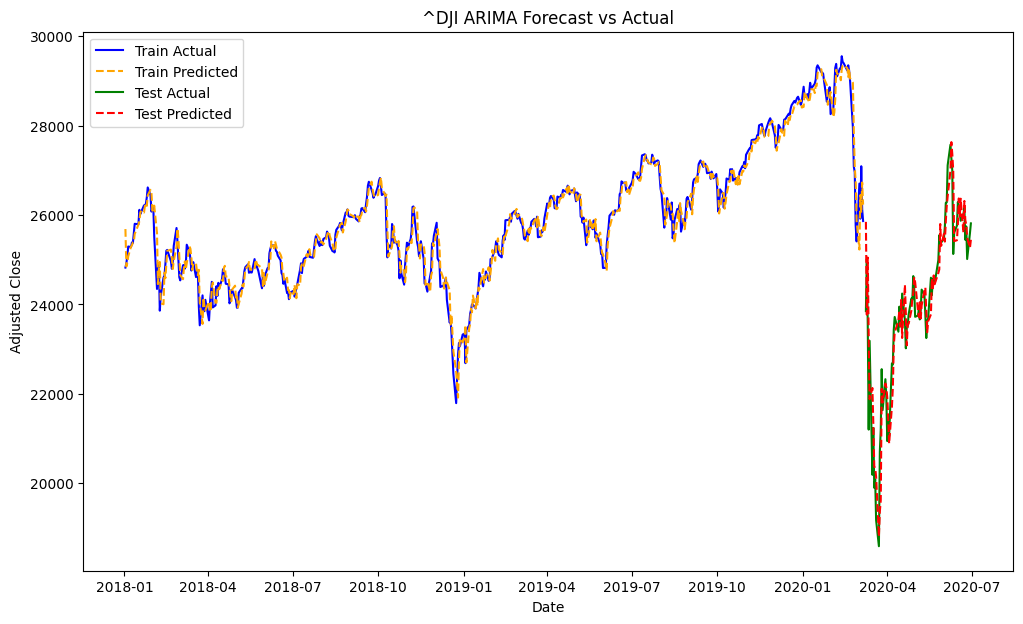

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


^GSPC - Train MSE: 893.9234710527603, Train MAE: 20.625914415095984, Train MAPE: 0.72956645665612%, Train R^2: 0.975125880636973
^GSPC - Test MSE: 5635.814656962991, Test MAE: 53.650518699220314, Test MAPE: 1.9470243373831901%, Test R^2: 0.8961734677626243


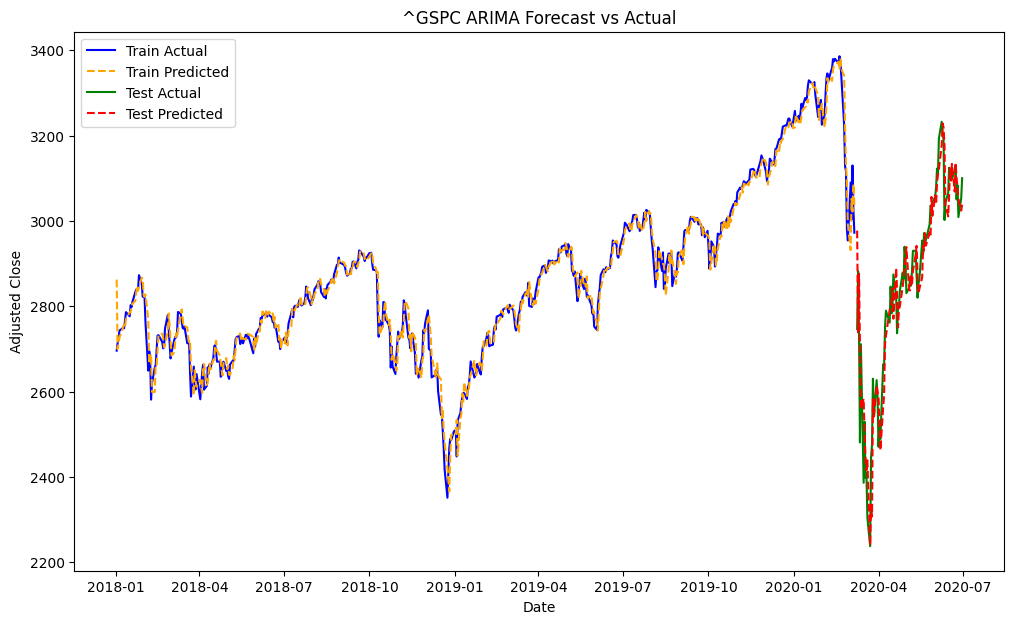

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


^IXIC - Train MSE: 10409.381531846635, Train MAE: 69.2141411593467, Train MAPE: 0.9025041714170522%, Train R^2: 0.9752902171917188
^IXIC - Test MSE: 47443.26768908136, Test MAE: 160.56154669261363, Test MAPE: 1.9291582043535502%, Test R^2: 0.9459272169611884


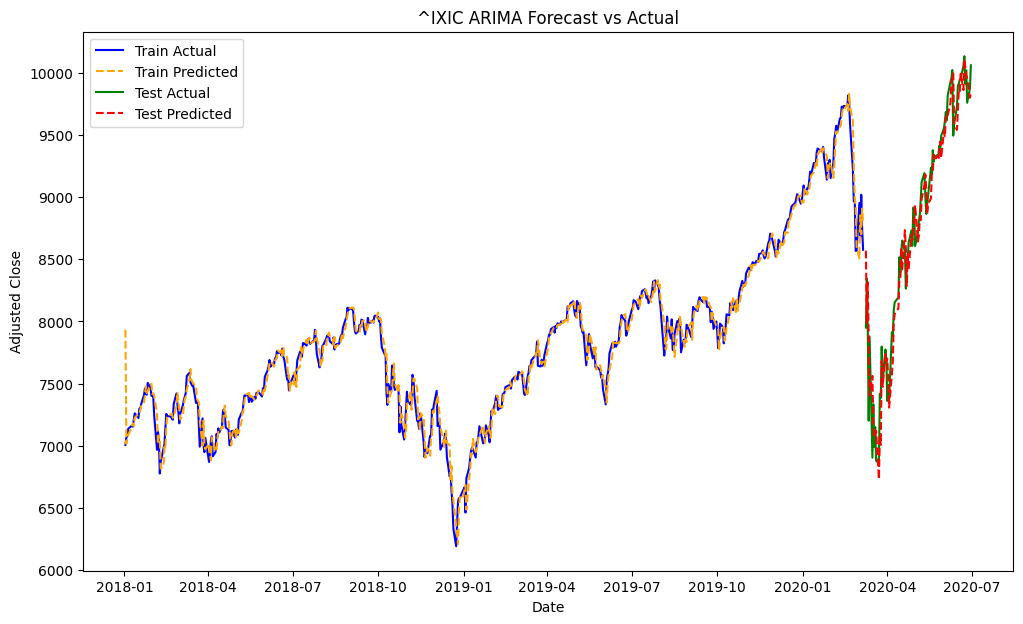

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


^RUT - Train MSE: 297.59432419173174, Train MAE: 13.005768757673309, Train MAPE: 0.8401163687334984%, Train R^2: 0.9549909778456696
^RUT - Test MSE: 2111.675561602201, Test MAE: 34.942799799249805, Test MAPE: 2.8111162325137515%, Test R^2: 0.8817967807990692


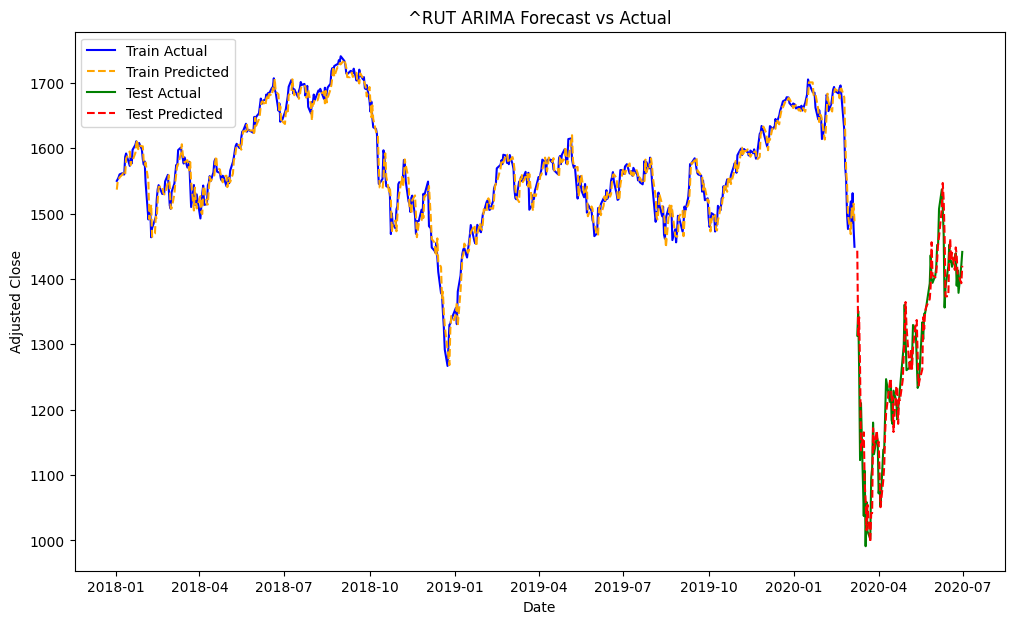

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

train = df_close['2018-01-02':'2020-03-08']
test = df_close['2020-03-09':'2020-06-30']

def fit_arima(series, order=(24,1,25)):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit

def evaluate_forecast(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs(predicted - actual) / np.abs(actual)) * 100
    r2 = r2_score(actual, predicted)
    return mse, mae, mape, r2

def process_series(name, train, test, p, d, q):
    full_series = pd.concat([train[name], test[name]])
    model_fit = fit_arima(full_series, order=(p, d, q))

    prediction = model_fit.predict(start=train[name].index[0], end=test[name].index[-1])

    train_pred = prediction.loc[train[name].index]
    test_pred = prediction.loc[test[name].index]

    train_mse, train_mae, train_mape, train_r2 = evaluate_forecast(train[name], train_pred)
    print(f"{name} - Train MSE: {train_mse}, Train MAE: {train_mae}, Train MAPE: {train_mape}%, Train R^2: {train_r2}")

    test_mse, test_mae, test_mape, test_r2 = evaluate_forecast(test[name], test_pred)
    print(f"{name} - Test MSE: {test_mse}, Test MAE: {test_mae}, Test MAPE: {test_mape}%, Test R^2: {test_r2}")

    plt.figure(figsize=(12, 7))
    plt.plot(train[name], label='Train Actual', color='blue')
    plt.plot(train[name].index, train_pred, label='Train Predicted', color='orange', linestyle='--')
    plt.plot(test[name], label='Test Actual', color='green')
    plt.plot(test[name].index, test_pred, label='Test Predicted', color='red', linestyle='--')
    plt.title(f"{name} ARIMA Forecast vs Actual")
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close')
    plt.legend()
    plt.show()

# Hyperparameters
p = 5  # Autoregressive terms
d = 0   # Differencing order
q = 5  # Moving average terms

indices = ['^DJI', '^GSPC', '^IXIC', '^RUT']
for index in indices:
    process_series(index, train, test, p, d, q)

^DJI - MSE: 487386.62680613983, MAE: 500.46626730291973, MAPE: 2.1485768961213596%, R^2: 0.8674316163459161

^GSPC - MSE: 5635.814656962991, MAE: 53.650518699220314, MAPE: 1.9470243373831901%, R^2: 0.8961734677626243

^IXIC - MSE: 47443.26768908136, MAE: 160.56154669261363, MAPE: 1.9291582043535502%, R^2: 0.9459272169611884

^RUT - MSE: 2111.675561602201, MAE: 34.942799799249805, MAPE: 2.8111162325137515%, R^2: 0.8817967807990692

**Comments on ARIMA performance**

The ARIMA model results for the four indices show varying levels of forecasting accuracy. The ^DJI index has the highest Mean Squared Error (MSE), indicating a larger average error in predictions, with an R² of 0.867, suggesting that the model explains a substantial portion of the variance. The ^GSPC index, while having a lower MSE than ^DJI, still has a relatively low Mean Absolute Percentage Error (MAPE) under 2%, with an R² indicating strong model performance. ^IXIC shows the best results in terms of R², which is very high at 0.946, and has low prediction errors, signifying a very good fit. Lastly, the ^RUT index also displays good model accuracy with a moderate R² of 0.882 and the highest MAPE among the indices, hinting at a slightly less consistent fit. Overall, the models for each index appear to be strong, but challenges did occur, particularly in reducing the prediction errors for ^DJI.